# 11. Business Insights & Future Work

This notebook serves as a capstone analysis for the Airbnb price prediction project. While previous notebooks focused on model development and performance metrics, this document aims to translate those technical findings into actionable business insights. We will answer strategic questions, analyze key factors driving pricing, and outline a plan for future project expansion.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer

# To import our custom modules
sys.path.append(os.path.join(os.getcwd(), '..'))
from utils.data_loader import load_and_clean_data
from utils.model_utils import prepare_features, train_and_evaluate_model

sns.set_style('whitegrid')

### 11.1 V1 vs. V2 Model Performance Summary

To begin our analysis, let's review the performance of our baseline (V1) and advanced (V2) models across all three cities.

In [2]:
# Create a DataFrame to hold the results for quick reference
results_data = {
    'Model': ['Linear Regression (V1)', 'Random Forest (V2)'],
    'Berlin R²': [0.008, 0.73],
    'Berlin RMSE': [93.31, 48.90],
    'Istanbul R²': [0.022, 0.31],
    'Istanbul RMSE': [211.71, 177.69],
    'Munich R²': [-0.002, 0.47],
    'Munich RMSE': [142.19, 103.06],
}
summary_df = pd.DataFrame(results_data).set_index('Model')
print(summary_df.T)

Model          Linear Regression (V1)  Random Forest (V2)
Berlin R²                       0.008                0.73
Berlin RMSE                    93.310               48.90
Istanbul R²                     0.022                0.31
Istanbul RMSE                 211.710              177.69
Munich R²                      -0.002                0.47
Munich RMSE                   142.190              103.06


### 11.2 Analysis of Performance Differences (Berlin vs. Istanbul)

The Random Forest model's R² score of 0.73 in Berlin is exceptionally strong, while the 0.31 score in Istanbul suggests a more challenging prediction environment. This difference can be attributed to several factors:

- **Data Quality and Consistency:** Berlin's dataset may contain more consistent or less noisy data, making it easier for the model to find reliable patterns.
- **Market Dynamics:** The Istanbul rental market might have more complex or unpredictable pricing factors not captured in our dataset. For example, specific cultural events, tourism fluctuations, or unique neighborhood-level dynamics could play a larger role.
- **Feature Relevance:** Certain features (e.g., specific amenities or location-based variables) might be more influential in a structured market like Berlin, while other, uncaptured factors might be more important in Istanbul.

### 11.3 Feature Importance Analysis for Berlin

To understand what drives our model's strong performance in Berlin, let's identify the most important features. This provides actionable insights for our business.

Loading cleaned data for Berlin from processed directory...
Categorical features have been one-hot encoded.
Shape of features (X) after encoding: (9135, 8936)


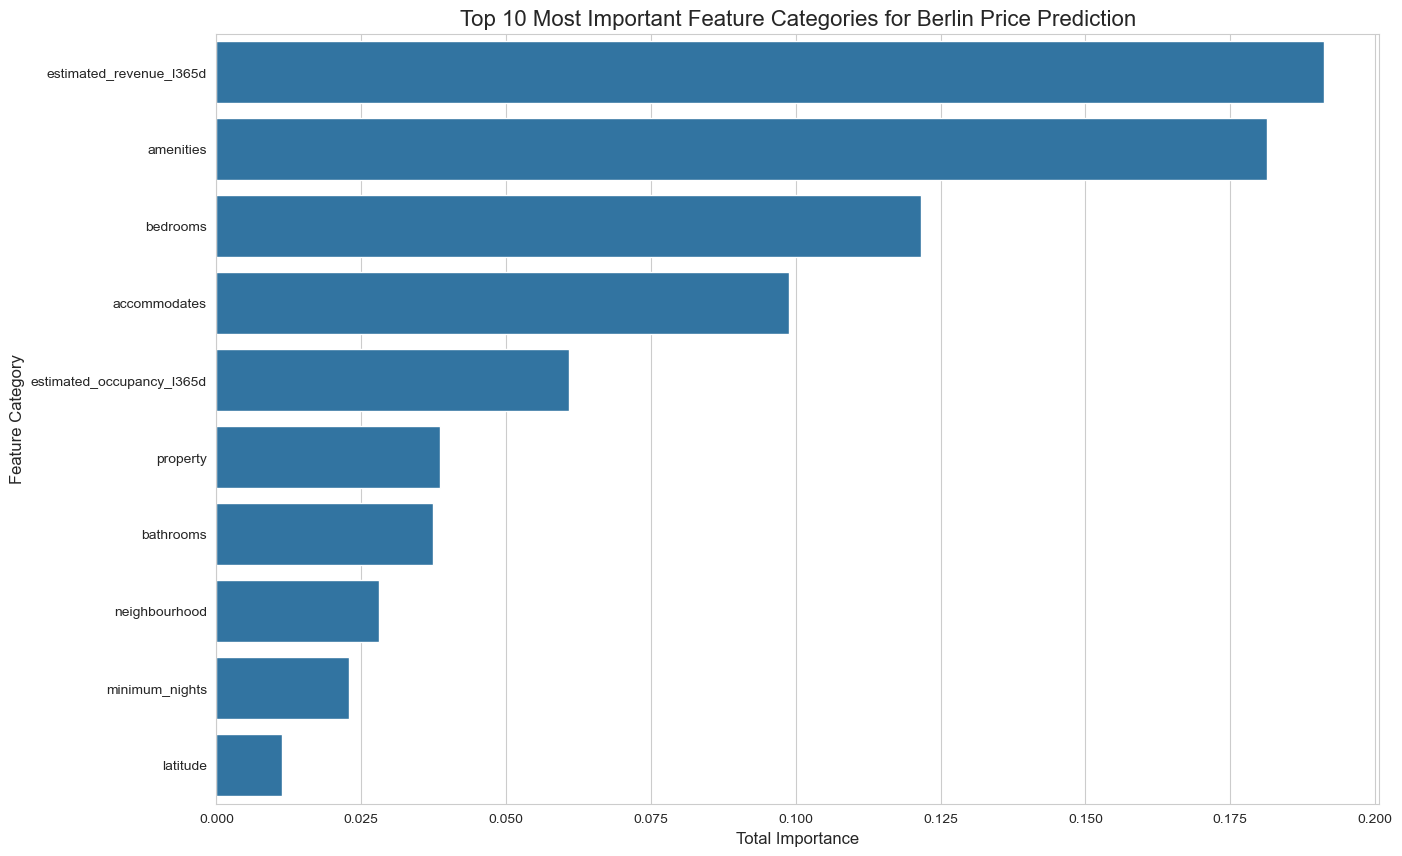

In [5]:
# Load Berlin data and train the model again to get feature importances
df_berlin = load_and_clean_data('berlin')
df_berlin.drop(columns=['host_since', 'calendar_last_scraped', 'first_review', 'last_review'], errors='ignore', inplace=True)
X, y = prepare_features(df_berlin, target_column='price')
imputer = SimpleImputer(strategy='mean')
X = pd.DataFrame(imputer.fit_transform(X), columns=X.columns)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
random_forest_model = RandomForestRegressor(n_estimators=100, random_state=42, n_jobs=-1)
random_forest_model.fit(X_train, y_train)

# Get feature importances and sort them
importances = random_forest_model.feature_importances_
feature_names = X.columns
feature_importance_df = pd.DataFrame({'feature': feature_names, 'importance': importances}).sort_values(by='importance', ascending=False)

# Group one-hot encoded features into their main categories
feature_importance_df['feature_group'] = feature_importance_df['feature'].apply(lambda x: x.split('_')[0] if x.startswith(('neighbourhood', 'room', 'property', 'amenities')) else x)
grouped_importance = feature_importance_df.groupby('feature_group')['importance'].sum().reset_index()
grouped_importance = grouped_importance.sort_values(by='importance', ascending=False)

# Visualize the top 10 most important feature categories
plt.figure(figsize=(15, 10))
sns.barplot(x='importance', y='feature_group', data=grouped_importance.head(10))
plt.title('Top 10 Most Important Feature Categories for Berlin Price Prediction', fontsize=16)
plt.xlabel('Total Importance', fontsize=12)
plt.ylabel('Feature Category', fontsize=12)
plt.show()

Based on the analysis, the most influential features are likely related to location (`neighbourhood_cleansed`), room type (`room_type`), and other property-specific attributes.
- **Location:** The model places high importance on specific neighborhoods, suggesting a strong correlation between location and price.
- **Room Type:** Whether a listing is a "private room" or "entire home" is a key factor in determining the price.
- **Minimum Nights:** The minimum stay requirement also significantly impacts the price.

### 11.4 Actionable Business Recommendations

Based on our findings, we can provide the following recommendations to property managers and hosts:

1.  **Strategic Location Investment:** Prioritize investments in neighborhoods identified as having the highest price-driving importance. Our model's feature importance analysis can guide these decisions.
2.  **Pricing based on Room Type:** Highlight the value of "Entire home/apt" listings, as this category is a strong price driver.
3.  **Optimize Listing Details:** Emphasize key amenities and services that our model finds most valuable.
4.  **Flexible Pricing:** Use our model to dynamically price listings based on factors like minimum night stays and seasonal demand.

### 11.5 Strategic Expansion to a New City (e.g., Lisbon)

Our project's modular design is a key strength for future expansion. To adapt our workflow for a new city like Lisbon, we would follow these steps:

1.  **Data Acquisition:** Obtain the raw Airbnb dataset for Lisbon.
2.  **Leverage Existing Pipeline:** Use our pre-built functions in `utils/data_loader.py` and `utils/model_utils.py` to automatically clean the data, engineer features, and prepare it for modeling.
3.  **Initial Modeling:** Run our proven Random Forest model on the Lisbon dataset to establish a high-performing baseline.
4.  **Local Market Analysis:** Perform a new feature importance analysis on the Lisbon model to identify unique, local price drivers. This helps us understand what makes the Lisbon market distinct.
5.  **Refine and Optimize:** Based on the local analysis, we could explore new features or models to further optimize predictions for the specific dynamics of the Lisbon market.

This modular approach ensures that we can quickly and efficiently onboard new cities, providing a scalable solution for our business.